In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

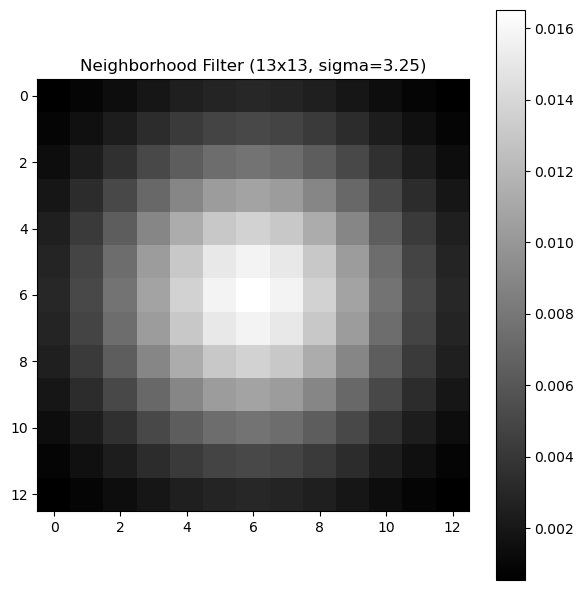

In [3]:
def create_gaussian_filter(fsize=9, sigma=2.5):
    """
    Create a 2D Gaussian filter of size (fsize x fsize) with standard deviation sigma.
    Ensures the sum of all values is 1.
    """
    ax = np.arange(-fsize//2 + 1, fsize//2 + 1)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2.0 * sigma**2))
    kernel /= np.sum(kernel)
    return kernel

fsize = 13
sigma = 3.25
filter_2d = create_gaussian_filter(fsize, sigma)

plt.figure(figsize=(6,6))
plt.imshow(filter_2d, cmap='gray', interpolation='nearest')
plt.title(f"Neighborhood Filter ({fsize}x{fsize}, sigma={sigma})")
plt.colorbar()
plt.tight_layout()
plt.savefig("images/neighborhood_filter.png", dpi=150)
plt.show()



In [4]:
data_folder = "data"
optimal_folder = "optimal_parameter"

image_path = os.path.join(data_folder, "imageData.npy")
mask_path = os.path.join(data_folder, "imageMask.npy")
final_membership_path = os.path.join(optimal_folder, "final_membership.npy")
final_bias_path = os.path.join(optimal_folder, "final_bias.npy")
final_means_path = os.path.join(optimal_folder, "final_class_means.npy")

# Load data
Y = np.load(image_path)            # shape (H, W)
M = np.load(mask_path)             # shape (H, W)
U = np.load(final_membership_path) # shape (H, W, K)
b = np.load(final_bias_path)       # shape (H, W)
c_means = np.load(final_means_path)# shape (K,)

H, W = Y.shape
K = U.shape[2]

print("Image shape =", Y.shape)
print("Mask shape  =", M.shape)
print("Membership shape =", U.shape)
print("Bias shape  =", b.shape)
print("Class means =", c_means)


Image shape = (256, 256)
Mask shape  = (256, 256)
Membership shape = (256, 256, 3)
Bias shape  = (256, 256)
Class means = [0.2475255 0.4721438 0.5716902]


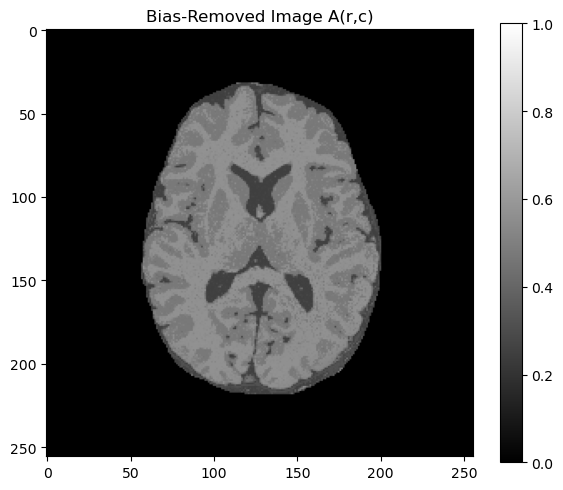

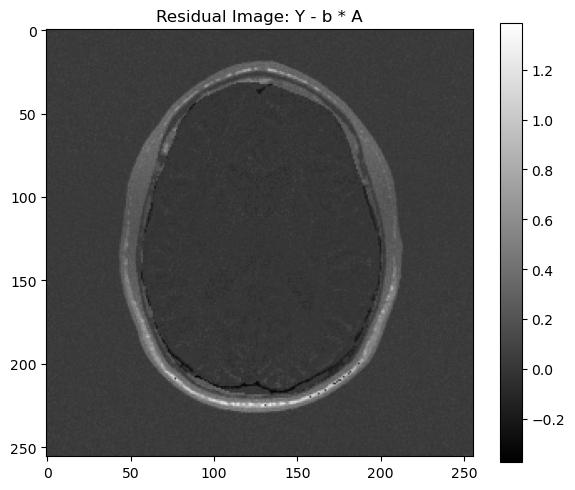

In [9]:
R = Y - (b * A)

plt.figure(figsize=(6,5))
plt.imshow(A, cmap='gray', vmin=0, vmax=1)
plt.title("Bias-Removed Image A(r,c)")
plt.colorbar()
plt.tight_layout()
plt.savefig("images/bias_removed_image.png", dpi=150)
plt.show()

plt.figure(figsize=(6,5))
plt.imshow(R, cmap='gray')
plt.title("Residual Image: Y - b * A")
plt.colorbar()
plt.tight_layout()
plt.savefig("images/residual_image.png", dpi=150)
plt.show()


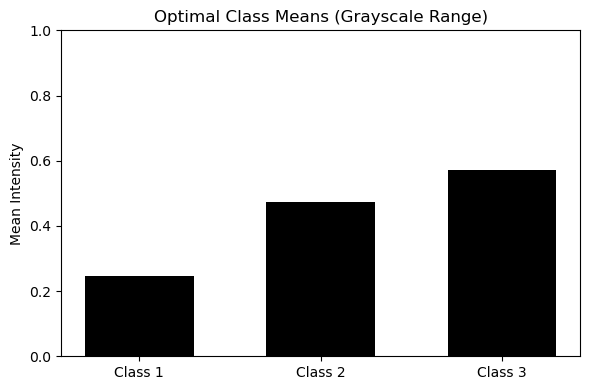

Class Means: [0.2475255 0.4721438 0.5716902]


In [10]:
plt.figure(figsize=(6,4))

K = len(c_means)
x_positions = np.arange(K)

# We'll use black bars, plus a small alpha if you like
plt.bar(x_positions, c_means, color='black', width=0.6)
plt.ylim([0,1])  # if you know your means are in [0..1], we fix the y-axis
plt.xticks(x_positions, [f"Class {k+1}" for k in range(K)])
plt.ylabel("Mean Intensity")
plt.title("Optimal Class Means (Grayscale Range)")
plt.tight_layout()
plt.savefig("images/final_class_means.png", dpi=150)
plt.show()
print("Class Means:", c_means)

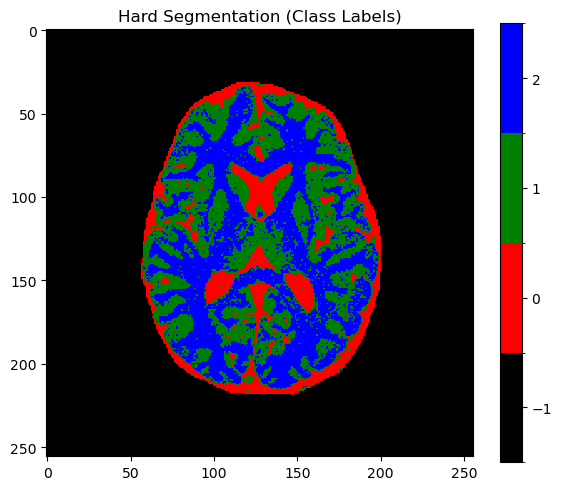

In [8]:
# shape(H,W), each pixel is the argmax along the class dimension
seg = np.argmax(U, axis=2)

# For clarity, mark outside-brain as -1
seg_masked = seg.copy()
seg_masked[M==0] = -1

# Create a discrete colormap for up to K classes + outside
cmap_list = ['black','red','green','blue','yellow','magenta','cyan','orange']
cmap = mcolors.ListedColormap(cmap_list[:(K+1)])
bounds = np.arange(-1.5, K+0.5, 1)
norm = mcolors.BoundaryNorm(bounds, cmap.N)

plt.figure(figsize=(6,5))
plt.imshow(seg_masked, cmap=cmap, norm=norm)
plt.title("Hard Segmentation (Class Labels)")
plt.colorbar(ticks=range(-1,K))
plt.tight_layout()
plt.savefig("images/hard_segmentation.png", dpi=150)
plt.show()
